<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---  

# Analisando a Violência no Rio de Janeiro

<center><img alt="RJ" width=50% src="https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-do-rio-de-janeiro_114360-3444.jpg"></center>

A violência no Brasil é um problema persistente que atinge direta ou indiretamente a população seja de Norte a Sul a violência é um tema latente nos noticiários e rodas de conversa. O país tem níveis acima da média mundial no que se refere a crimes violentos, com níveis particularmente altos no tocante a violência armada e homicídios.

Atualmente, leis como a que provê acesso à informação além da conscientização dos órgãos públicos, proporciona acesso à várias fontes de dados.

Em nossa analise, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/). No projeto deste Módulo, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

* Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
* Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html

## Obtenção dos Dados

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

### Importando os dados



In [1]:
# importar o Pandas
import pandas as pd
import matplotlib.pyplot as plt
print("BIBLIOTECA PANDAS E MATPLOTLIB IMPORTADA!!!")
# carregar o Dataset apartir do link
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")
print("DATASET CARREGADO!!!")

BIBLIOTECA PANDAS E MATPLOTLIB IMPORTADA!!!
DATASET CARREGADO!!!


## Análise Inicial dos Dados

Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

In [2]:
# Verificar o tamanho do Dataset:

print("Variáveis (Colunas): ",df.shape[1])
print("Entradas (Linhas): ", df.shape[0])

Variáveis (Colunas):  56
Entradas (Linhas):  344


Agora que já sabemos a dimensão dos dados com que estamos lidando, vamos verificar que tipo de dados nós temos, verificando as variáveis existentes no nosso conjunto de dados.

In [3]:
# Imprimir os nomes das colunas

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Agora que já sabemos as colunas ou varáries com que estamos lidando, vamos verificar que tipo de dados nós temos em cada variável.
Isso auxilia no trabalho de limpeza de dados.

In [4]:
# verificar o tipo dos dados das colunas/variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Aqui é interessante notar que todas as variáveis presentes no dataset são do 
tipo numérico, sejam elas `int` ou `float`.

Com tudo isso em mente, é hora de darmos uma olhada nesse dataset e ver como ele está organizado, como esses dados são apresentados e termos uma ideia do que podemos fazer com eles.

In [5]:
# Ver as 5 primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


É interessante reparar que algumas variáveis apresentam muitos dados ausentes. Dado o grande intervalo de tempo apresentado no dataset, podemos sugerir algumas hipóteses do que poderia explicar essa ausência, e como podemos contorná-la para continuar explorando o conjunto de dados.

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais.

* Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, o que dizer da mesma no período em tela? Devemos levar em consideração também o formato em que esses dados eram registrados à época. Será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Antes de decidirmos o que fazer em relação aos dados ausentes, vamos verificar a proporção deles em relação à totalidade do dataset.

In [6]:
# ver um resumo da quantidade de dados ausentes
df.isnull().sum().sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

In [7]:
# a porcentagem desta quantidade de dados ausentes por variável
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Acima, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis como é o exemplo de crimes relacionados a bicicletas e apreensão de drogas.

Como os dados estão estruturados ao longo do tempo, uma forma de realizar uma análise que condiza melhor com a realidade, podemos analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)

## Informações Estatísticas da Violência no Rio de Janeiro

Vamos utilizar o método ``describe()`` para visualizar a distribuição estatística do dataframe

In [8]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes contra o Patrimônio - Veículos

Esta seção do projeto vamos dedicar a investigar os dados em relação a crimes de roubo e furto de veículos.

Este é um problema comum nas grandes metrópoles Brasileiras, eu mesmo em "Goiânia" tive um veículo furtado, e este tipo de crime merece um destaque em nosos projeto. Com os dados de roubo, furto e recuperação de veículos, vamos utilizar essas informações para encontrar resultados pertinentes na relação da situação e o combate a este tipo de crime.

**Para conhecimento, sobre a diferença entre Roubo e Furto:**


Se um ladrão toma algo que pertence a outra pessoa sem estabelecer contato com ela, comete *furto*. Se houver contato com a vítima, violência ou ameaça, é *roubo*. 

In [9]:
# ver a média da variável roubo_veiculo. Imprimindo a média com 2 decimais.
media_roubo_veiculo = df.roubo_veiculo.mean()
print(round(media_roubo_veiculo,2))

2448.7


A média de roubo de veículos é 2448,7 por mês.

In [10]:
# ver a média da variável furto_veiculo. Imprimindo a média com 2 decimais.
media_furto_veiculo = df.furto_veiculos.mean()
print(round(media_furto_veiculo,2))

1674.67


Para Furtos de veículos a média de registros são 1674,67 furtos registrados por mês.

In [11]:
# vamos verificar também a média de veículos recuperados
media_recuperacao_veiculo = df.recuperacao_veiculos.mean()
print(round(media_recuperacao_veiculo,2))

1772.24


A média registrada de Veículos recuperados por mês é 1772,24 

Vamos calcular a média de Veículos perdidos, e porcentagem de carros recuperados

In [12]:
# média total de veículos perdidos por mês Furto + Roubo

total_veiculos_perdidos = media_roubo_veiculo + media_furto_veiculo
print("A Média de Veículos perdidos por Mês é: {:.2f}".format(total_veiculos_perdidos))

# média de veículos recuperados por mês

media_recuperacao_veiculo = df.recuperacao_veiculos.mean()
print("A Média de Veículos recuperados por Mês é: {:.2f}".format(media_recuperacao_veiculo))

# Porcentagem de veículos recuperados
porc_recuperados = media_recuperacao_veiculo / total_veiculos_perdidos * 100
print("A Porcentagem de Veículos recuperados em relação aos veículos perdidos por Mês é: {:.2f}%".format(porc_recuperados))



A Média de Veículos perdidos por Mês é: 4123.37
A Média de Veículos recuperados por Mês é: 1772.24
A Porcentagem de Veículos recuperados em relação aos veículos perdidos por Mês é: 42.98%


**A seguir, uma gráfico de linhas para visualização de soma *Roubo + Furto* de Veículos por *Veículos Recuperados*.**

In [13]:
# vamos realizar uma cópia do DataFrame, para melhor análise
df_cop = df.copy()

# Setar o Index em um multi-index (ano / mes)
df_cop.set_index(['vano','mes'], inplace=True)

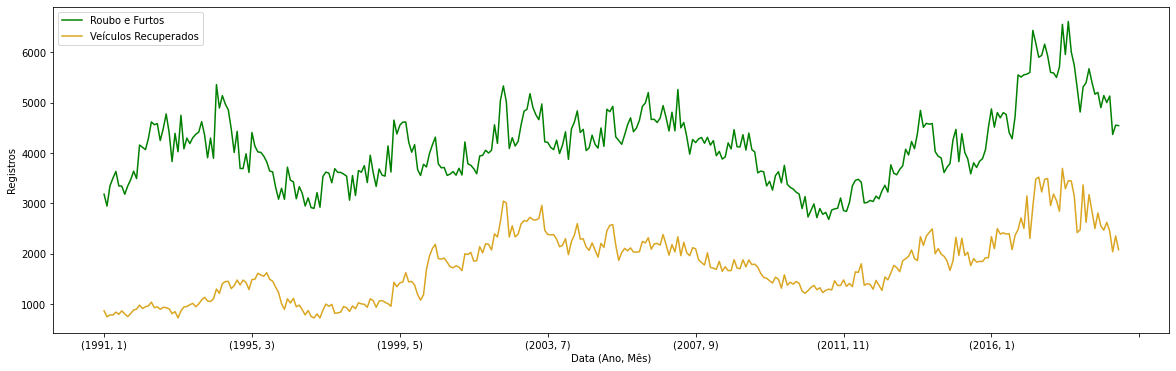

In [14]:
# Define tamanho as dimensões do gráfico
fig = plt.figure(figsize=(20,6))



roubo_e_furto = df_cop.roubo_veiculo + df_cop.furto_veiculos #Soma a quantidade de roubos e furtos do periodo
roubo_e_furto.name = 'Roubo e Furtos'
df_cop.recuperacao_veiculos.name = 'Veículos Recuperados'
roubo_e_furto.plot(legend=True, color='green');
df_cop.recuperacao_veiculos.plot(legend=True, color='goldenrod');
plt.xlabel('Data (Ano, Mês)');
plt.ylabel('Registros');
plt.savefig('roubosefurtos.png', dpi=400)
plt.show()

### Crimes contra a Vida

Vamos identificar qual foi o máximo e mínimo registrado para a variável ``hom_doloso`` ao longo do período apresentado neste dataset

In [15]:
# Valores Máximo e Mínimo Homicidio Doloso

max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# Imprimir/Apresentar os valores Máximo e Mínimo, variável hom_doloso

print(" O Mínimo de registros de Homícidio Doloso durante o período do Dataset: {}".format(min_hom_doloso))
print(" O Máximo de registros de Homícidio Doloso durante o período do Dataset: {}".format(max_hom_doloso))

 O Mínimo de registros de Homícidio Doloso durante o período do Dataset: 272
 O Máximo de registros de Homícidio Doloso durante o período do Dataset: 831


Podemos ver acima que foram registrados 272 casos de Homícidio Doloso no mês com menor incidência deste crime.
Por outro lado no mês que houve o maior incidência do crime de Homícidio Doloso foram registrados 831 casos.


Vamos dar uma olhada nessas entradas, logo abaixo:

In [16]:
# verificar o mês com menor número de homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [17]:
# verificar o mês com maior número de homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


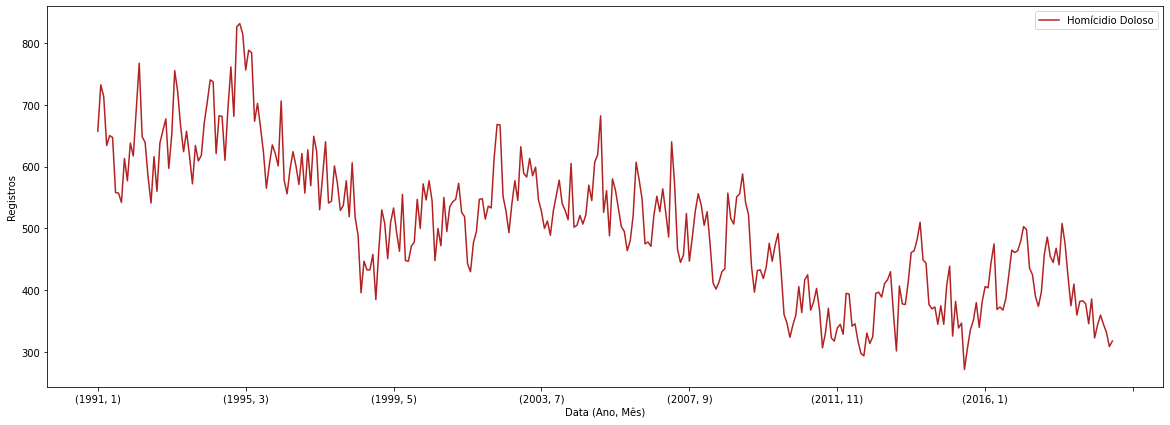

In [18]:
# plotar o gráfico de linhas para homicídio doloso

fig_hom_doloso = plt.figure(figsize=(20,7))


df_cop.hom_doloso.name='Homícidio Doloso'
df_cop.hom_doloso.plot(legend=True, color='firebrick');
plt.xlabel('Data (Ano, Mês)');
plt.ylabel('Registros');
plt.savefig('homicidio_doloso.png', dpi=400)
plt.show()

Acima, podemos constatar que Janeiro de 1995 foi o mês e ano com maior incidência de Homicídio Doloso na cidade do Rio de Janeiro, lembrando que este é um dataset oficial do Instituto de Segurança Pública do Rio de Janeiro.

No mesmo Dataset conseguimos extrair um dado relevante em relação a este tipo de crime, Homícidio Doloso em Junho de 2015 ocorreu menos casos de Homícido Doloso com 272 casos registrados. 

Ao longo de 350 meses, 

O que sugere um bom sinal, que talvez, o crime esteja diminuindo. Apenas uma análise mais profunda pode nos dizer.

## Visualização de Dados

Breve contextualização...

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


## Visualização de Dados

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável ``hom_doloso``.

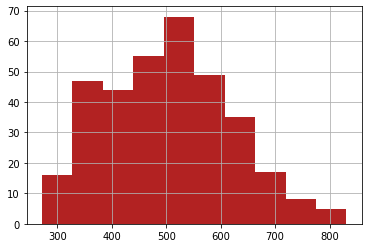

In [19]:
# 
df.hom_doloso.hist(color='firebrick');

No Gráfico acima podemos visualizar:


*   Houve 70 meses onde o número de homicídios foi de 500-550;
*   Houve menos de 10 meses com registro acima de 700 Homicídios Dolosos.



Por último, vamos analisar a variável ``roubo_em_coletivo`` utilizando um gráfico de linha.

In [20]:
min_roubo_coletivo = df.roubo_em_coletivo.min()
max_roubo_coletivo = df.roubo_em_coletivo.max()
reg_linhas = df.shape[0]
print('Gráfico da Quantidade de linhas ou meses do Dataset {}, \npor quantidade de Registros de Roubo em Coletivos o mínimo {} \ne o máximo registrado {}'.format(reg_linhas, min_roubo_coletivo, max_roubo_coletivo))


Gráfico da Quantidade de linhas ou meses do Dataset 344, 
por quantidade de Registros de Roubo em Coletivos o mínimo 281 
e o máximo registrado 1628


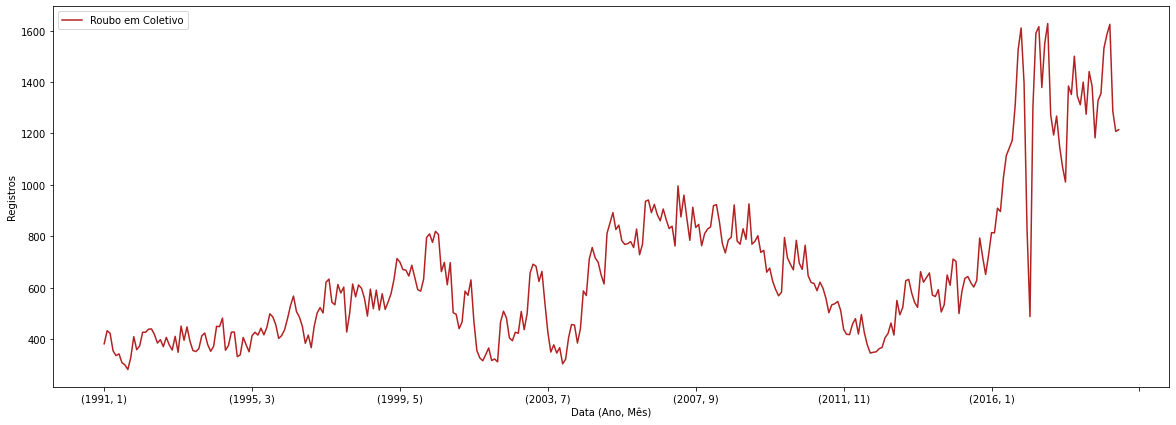

In [21]:
# plotar o gráfico de linhas para Roubo em Coletivo

fig_roubo_em_coletivo = plt.figure(figsize=(20,7))


df_cop.roubo_em_coletivo.name='Roubo em Coletivo'
df_cop.roubo_em_coletivo.plot(legend=True, color='firebrick');
plt.xlabel('Data (Ano, Mês)');
plt.ylabel('Registros');
plt.savefig('roubo_em_coletivo.png', dpi=400)
plt.show()

## Conclusão

Baseado nesta análise podemos afirmar que o estado do Rio de Janeiro melhorou alguns indicadores de violência em outros piorou, conhecido por suas belezas naturais e marcado pela violência não diferente de outros estados Brasileiros.

A iniciativa do Governo do Estado do Rio de Janeiro em publicar dados como estes ajuda a entender a "Tendência" no tipo de crime praticado, entender o motivo do preço de um seguro automotivo.